In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload
from skylens import *
from survey_utils import *

In [2]:
ncpu=2
LC,scheduler_info=start_client(Scheduler_file=None,local_directory=None,n_workers=ncpu,threads_per_worker=1,
                                  memory_limit='100gb',dashboard_address=8801,processes=True)
client=client_get(scheduler_info=scheduler_info)

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid24875/


In [3]:
fig_home='./figures/'

In [4]:
s1_s2s={}
s1_s2s[corr_gg]=(0,0)
s1_s2s[corr_ll]=[(2,2),(2,-2)]
s1_s2s[corr_ggl]=(0,2)

In [5]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l2200_w4400_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l2200_w4400_2_reorder.zarr'


# Power Spectrum covariance

In [6]:
test=False

In [7]:
do_pseudo_cl=True
do_xi=False

use_binned_l=False
store_win=True

do_cov=False
SSV_cov=False
Tri_cov=False
sparse_cov=True

f_sky=0.3
nside=1024
use_window=True

bin_cl=True
bin_xi=True

nz_PS=100

In [8]:
#setup parameters
lmax_cl=nside*2
lmax2=int(lmax_cl/2)#1000
if test:
    lmax_cl=200
    nside=512
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax2 #1000 #lmax_cl-10
Nl_bins=40
# l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=500)
lb=0.5*(l_bins[1:]+l_bins[:-1])

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl+1),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

theta_bins=np.logspace(np.log10(1./60),1,20)

window_lmax=lmax_cl_Bins*2

if window_lmax>3*nside:
    print('nside of window too small')

##  Test with 1 redshift bin

In [9]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 273 3071 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:91: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
../skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
../skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(shear_zbins[i]['window'])


In [10]:
bi=(0,0)

In [11]:
corrs=[corr_gg]
corr=corrs[0]

In [12]:
Skylens_kwargs=parse_dict(locals())

In [13]:
#use all ell
Skylens_kwargs['use_window']=False
kappa0=Skylens(**Skylens_kwargs)
kappa0.gather_data()
Skylens_kwargs['use_window']=True
# kappa0=Skylens(shear_zbins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, galaxy_zbins=zs_bin1,
#                                        use_window=use_window,Tri_cov=Tri_cov,
#                                        use_binned_l=use_binned_l,wigner_files=wigner_files,
#                                        SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
#                                        store_win=store_win,window_lmax=window_lmax,
#                                        sparse_cov=True,do_pseudo_cl=do_pseudo_cl,
#                                        corrs=corrs
#                                        )

pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 9 2048 2049.0 2
Window done. Size: 0.0
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary


In [14]:
%time cl0G=kappa0.cl_tomo() 

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 25.7 s, sys: 1.22 s, total: 26.9 s
Wall time: 1.87 s


In [15]:
win_Cl=client.compute(cl0G['cl'][corr][bi]).result()
cl0=win_Cl*1.

In [16]:
window_l_test=kappa0.l
wu=window_utils(l=l0[:lmax2],window_l=window_l_test,use_window=True,s1_s2s={corr:s1_s2s[corr]},
                corrs=corrs,wigner_step=l0.max()+1,wigner_files=wigner_files)
wu.set_wig3j()
wj2=client.compute(wu.wig_3j_2).result()
wj2=wj2[0]['00']

Win gen: step size 2048 1024 2048.0 10
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l2200_w4400_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])


In [17]:
win_Cl.shape,wj2.shape

((2048,), (1024, 1024, 2048))

In [18]:
M=wj2@(win_Cl*(2*l0+1))
M/=4.*np.pi
M*=wu.MF



In [19]:
win_Cl2=win_Cl[:lmax2]*f_sky

In [20]:
NM=M/np.sqrt(np.outer(win_Cl2,win_Cl2)) 
EM=1./win_Cl2*M
EM2=M*1./win_Cl2

In [21]:
l0

array([   0,    1,    2, ..., 2045, 2046, 2047])

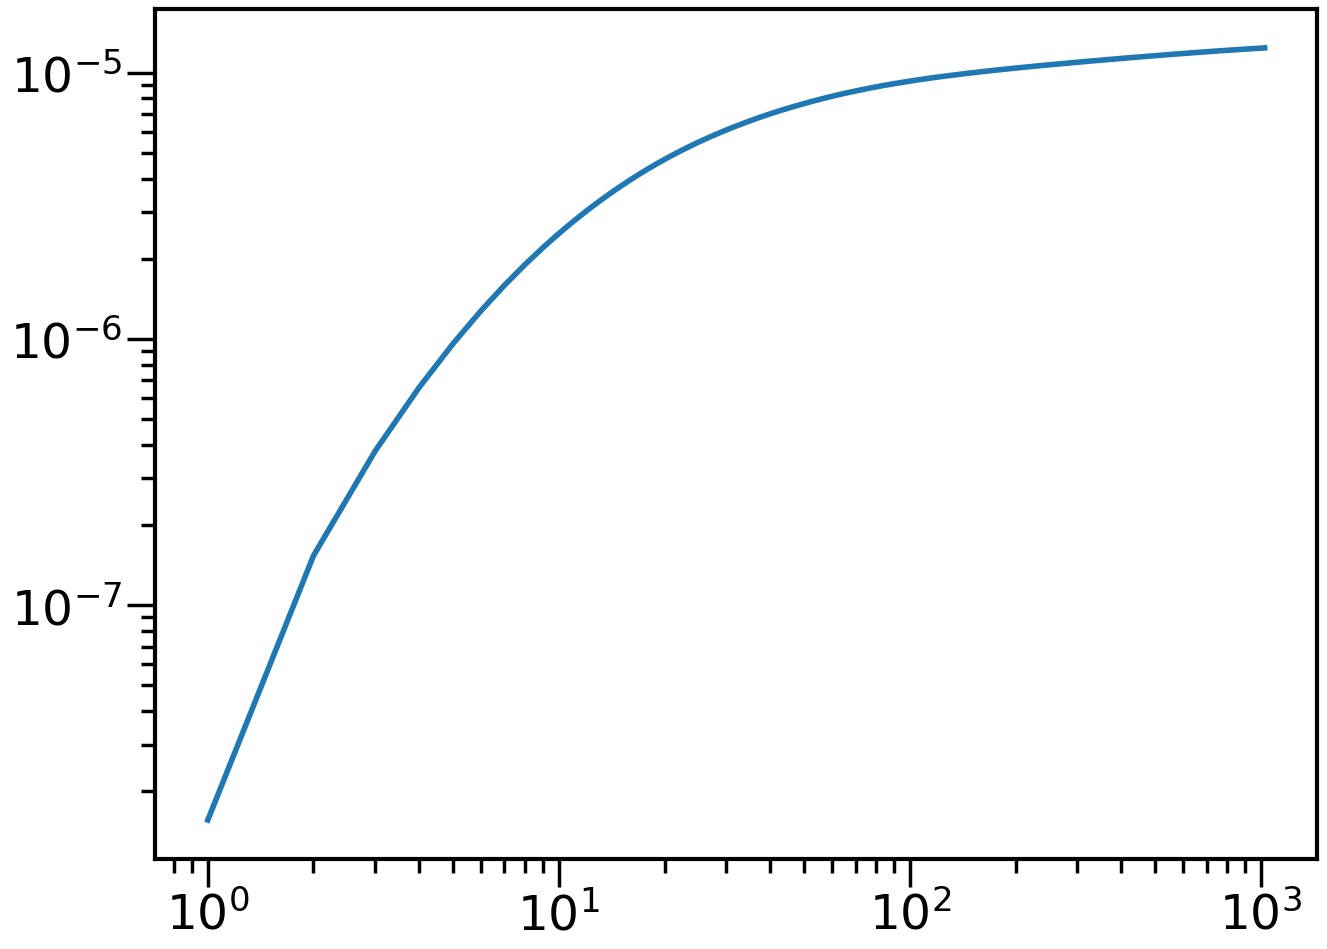

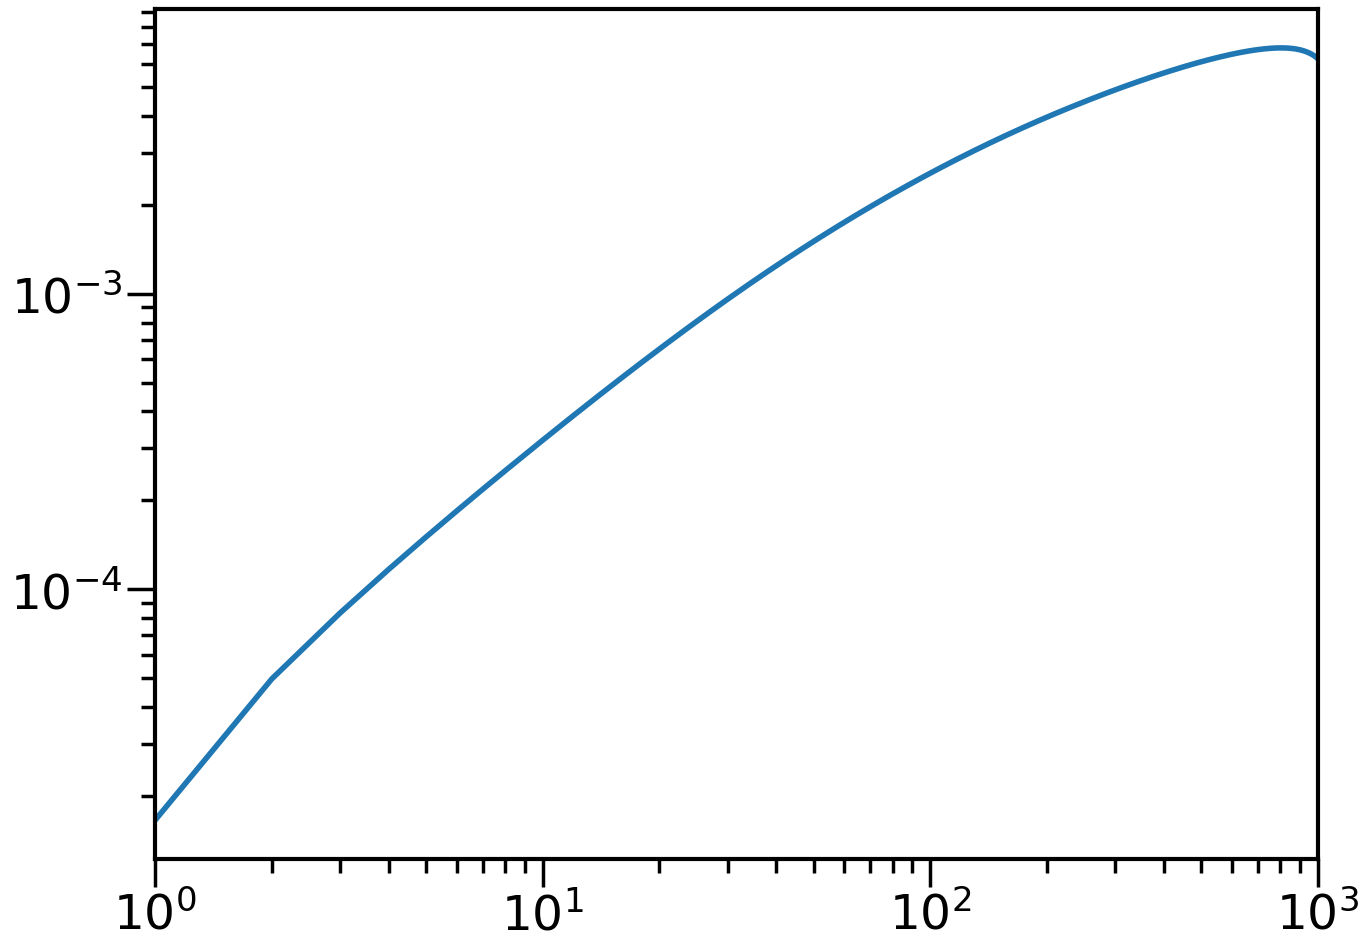

In [22]:
plot(l0[:lmax2]+1,np.diag(M)) #
xscale('log')
yscale('log')
show()
plot(l0[:lmax2]+1,M@np.ones_like(l0[:lmax2]))
xscale('log')
yscale('log')
xlim(1,1000)
show()

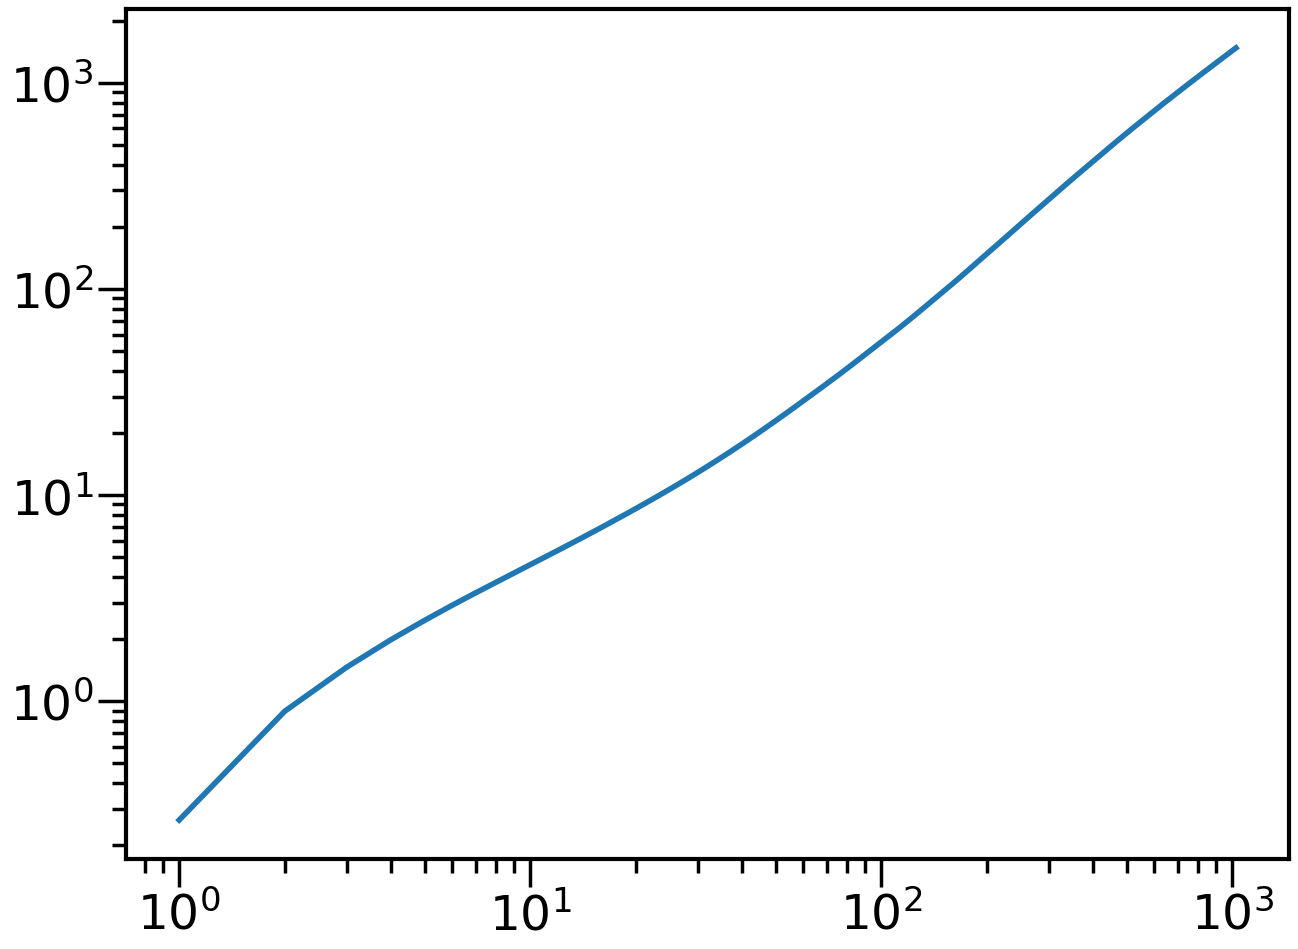

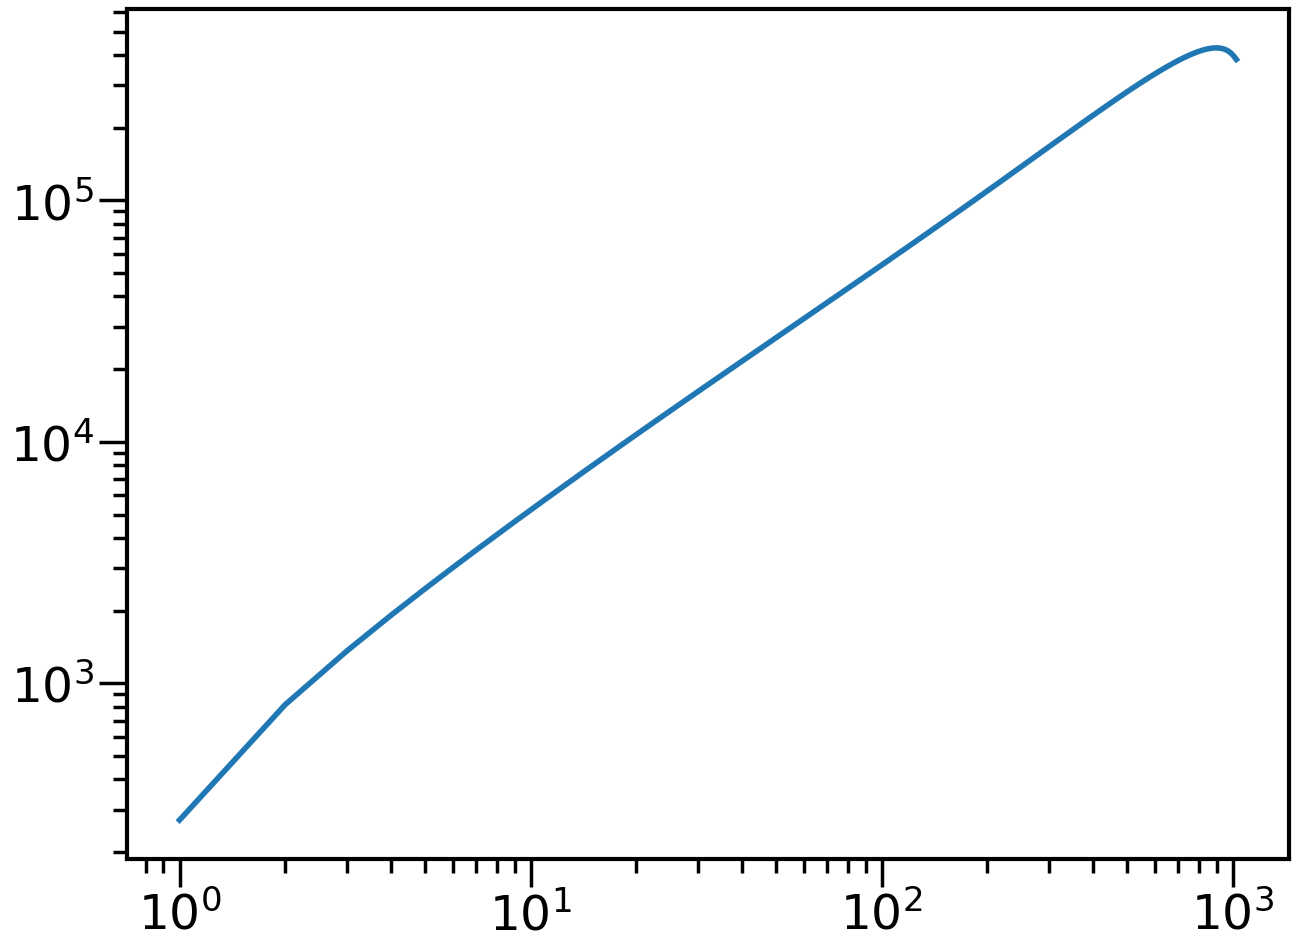

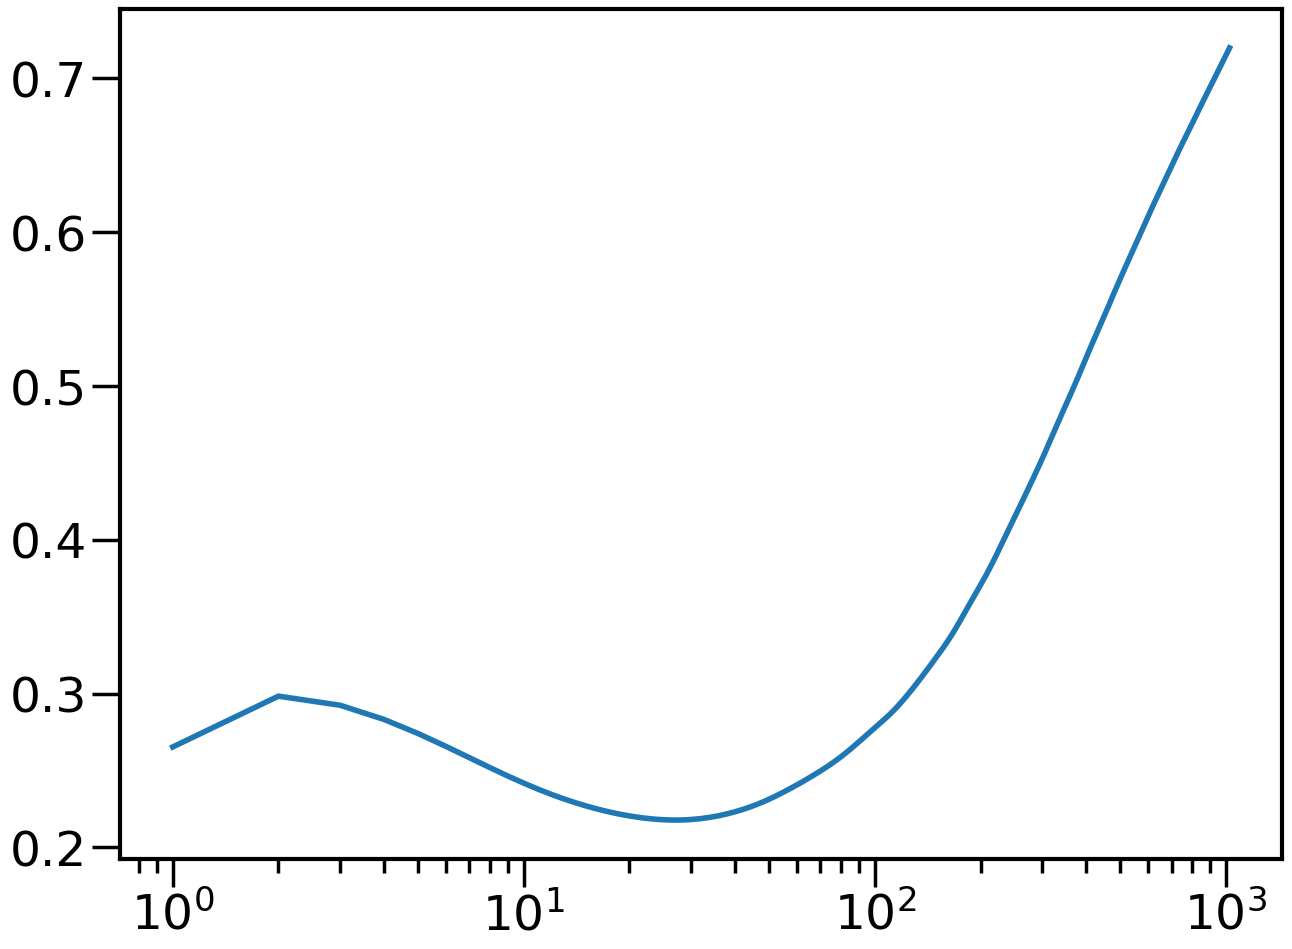

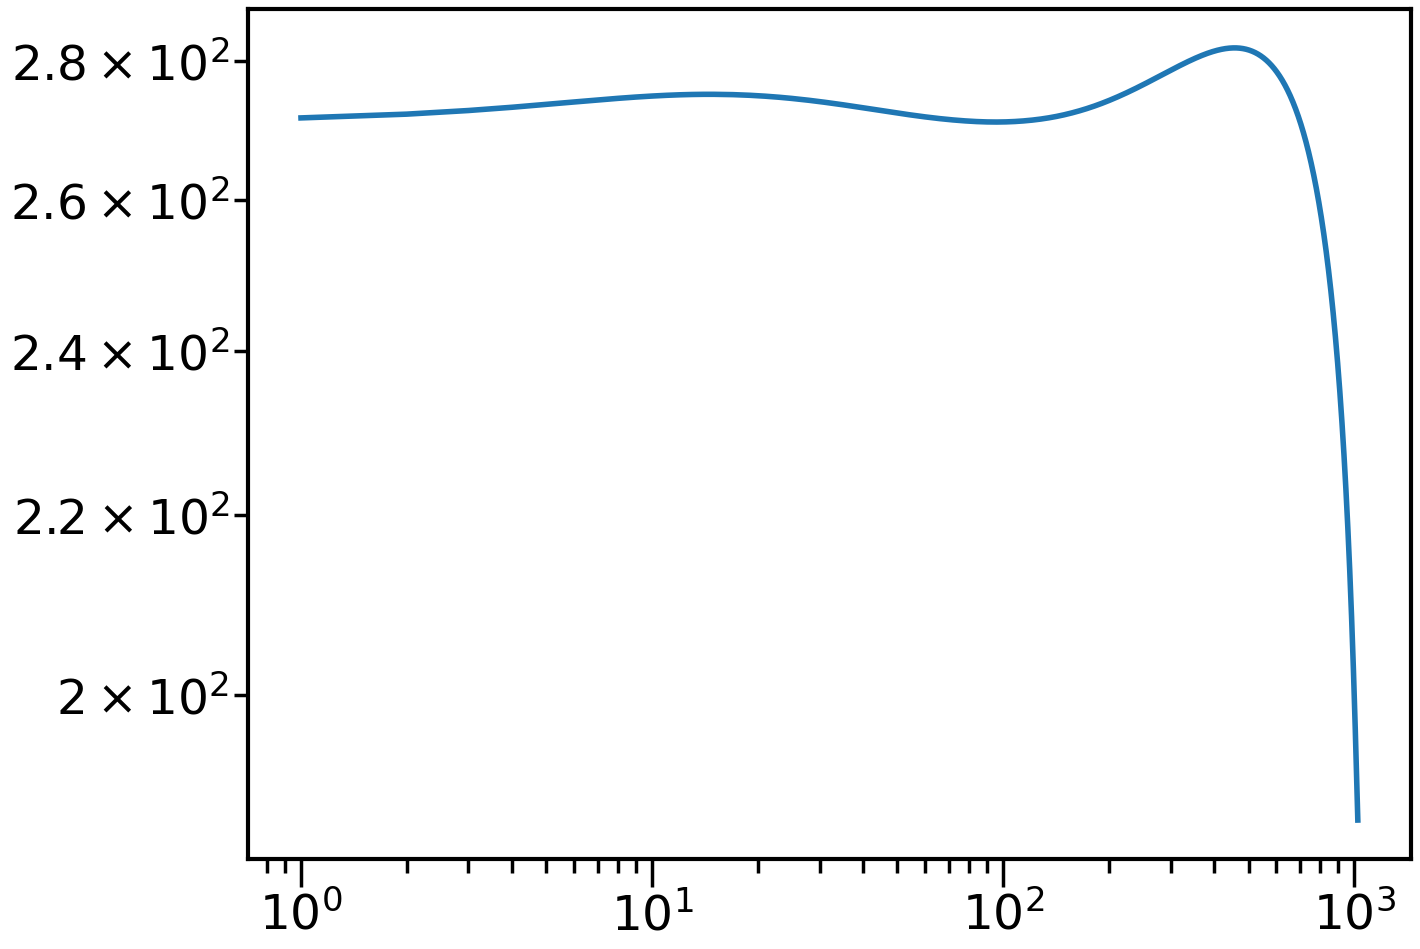

In [23]:
plot(l0[:lmax2]+1,np.diag(EM)) #
xscale('log')
yscale('log')
show()
plot(l0[:lmax2]+1,EM@np.ones_like(l0[:lmax2])) #
xscale('log')
yscale('log')
show()
plot(l0[:lmax2]+1,np.diag(EM)/(2*l0[:lmax2]+1))
xscale('log')
# yscale('log')
show()
plot(l0[:lmax2]+1,(EM@np.ones_like(l0[:lmax2]))/(2*l0[:lmax2]+1)) #
xscale('log')
yscale('log')
show()


In [24]:
shear_zbins[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'bz1', 'AI', 'AI_z', 'mag_fact', 'shear_m_bias', 'lm', 'k_max', 'window_cl0', 'window', 'window_N'])

In [25]:
w_alm=hp.map2alm(shear_zbins[0]['window'])
wlt0=hp.anafast(shear_zbins[0]['window'])

In [26]:
fsky=0.3
lmm=3*nside
lt=np.arange(lmm)
Nl=np.mean(wlt0[100:200])
Nl*=2
cov=2./(2*lt+1)/fsky*((wlt0+Nl)**2)
err=np.sqrt(cov)
err[:10]=0
# fl=1+0.4/np.sqrt(lmm)*np.sqrt(lt)
fl=1+np.sqrt(err/wlt0)
# w_alm2=hp.almxfl(w_alm,fl,inplace=False)
w_alm2=w_alm+hp.synalm(err)

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(


In [27]:
mask=shear_zbins[0]['window']!=hp.UNSEEN
# ww=hp.alm2map(w_alm2,nside=nside)#skylens_kwargs[0]['shear_zbins'][0]['window']*.995
ww=hp.synfast(err,nside=nside)
ww-=ww[mask].mean()
ww[~mask]=hp.UNSEEN
cl_map=ww+shear_zbins[0]['window']
cl_map[~mask]=hp.UNSEEN

cl_mapg=ww+shear_zbins[0]['window']
cl_mapg[~mask]=hp.UNSEEN

wlt=hp.anafast(cl_map)
ww[mask].mean(),cl_map[mask].mean(),shear_zbins[0]['window'][mask].mean()

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


(4.031877469780135e-18, 0.940316103744996, 0.9403161037449965)

In [28]:
shear_zbins2=copy.deepcopy(shear_zbins)
shear_zbins2[0]['window']=cl_map

In [29]:
Skylens_kwargs['use_window']=True
Skylens_kwargs['use_binned_l']=True
Skylens_kwargs['wigner_step']=50
Skylens_kwargs['l']=l0[:lmax2]

Skylens_kwargs2=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs2['shear_zbins']=shear_zbins2
Skylens_kwargs2['galaxy_zbins']=shear_zbins2

In [30]:
client

Client Scheduler: tcp://127.0.0.1:46715 Dashboard: http://127.0.0.1:8801/status,Cluster Workers: 2 Cores: 2 Memory: 200.00 GB


In [31]:
wj2.shape

(1024, 1024, 2048)

In [35]:
M0=wj2@(wlt0[:l0.max()+1]*(2*l0+1))
M0/=4.*np.pi
M0*=wu.MF

M2=wj2@(wlt[:l0.max()+1]*(2*l0+1))
M2/=4.*np.pi
M2*=wu.MF


In [36]:
pcl0=np.zeros_like(kappa0.l,dtype='float64')
pcl2=np.zeros_like(kappa0.l,dtype='float64')

pcl0[:lmax2]+=M0@cl0[:lmax2]
pcl2[:lmax2]+=M2@cl0[:lmax2]

pcl0_b=kappa0.bin_cl_func(cl=pcl0)
pcl2_b=kappa0.bin_cl_func(cl=pcl2)

In [37]:
pcl0

array([4.71425952e-08, 1.36436677e-07, 2.13310319e-07, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

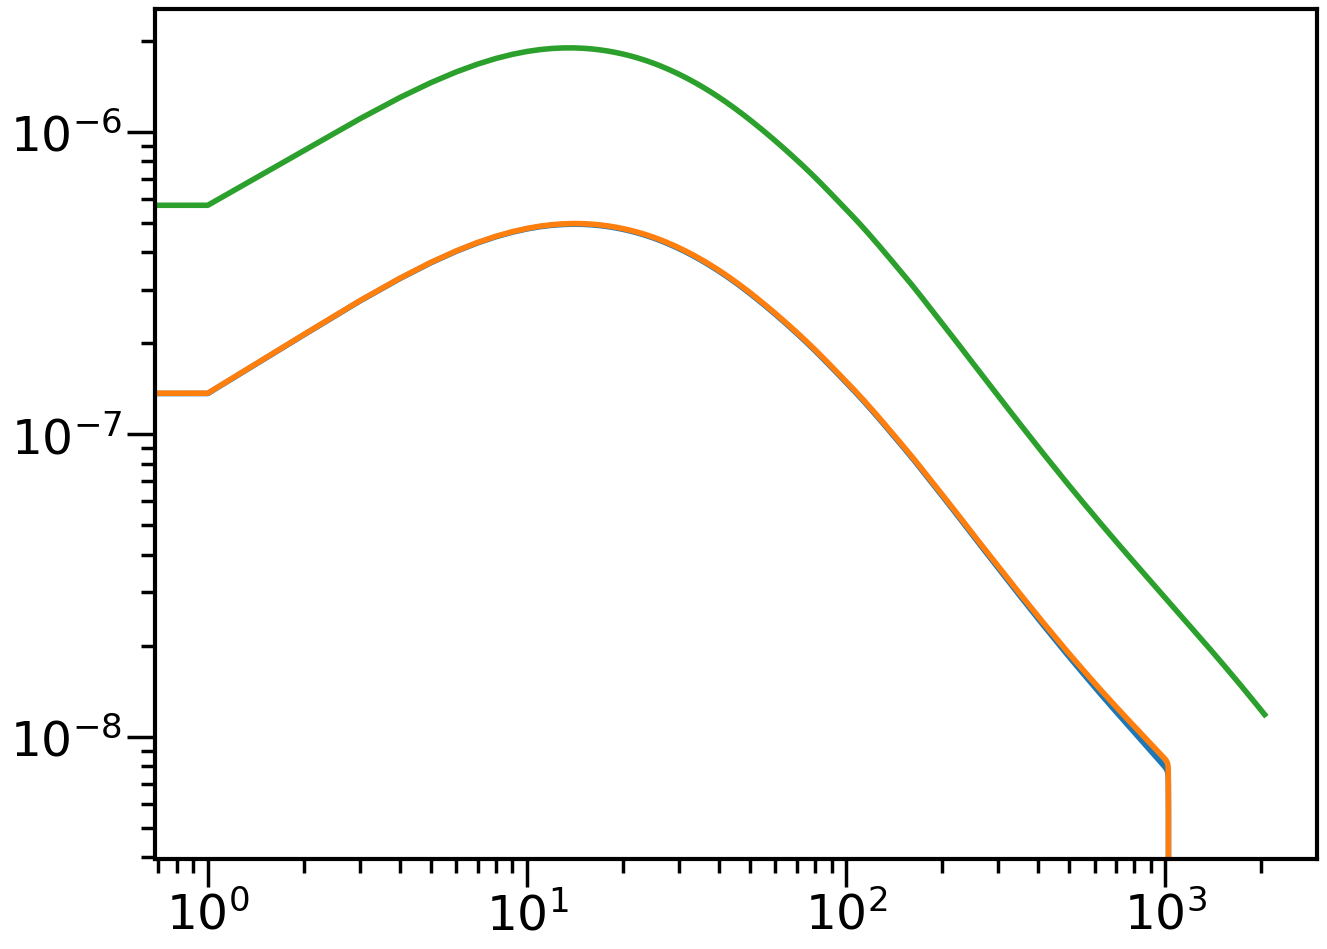

<ipython-input-40-b5bd6a764df9>:6: RuntimeWarning: invalid value encountered in true_divide
  plot(l0,1-pcl0/pcl2)


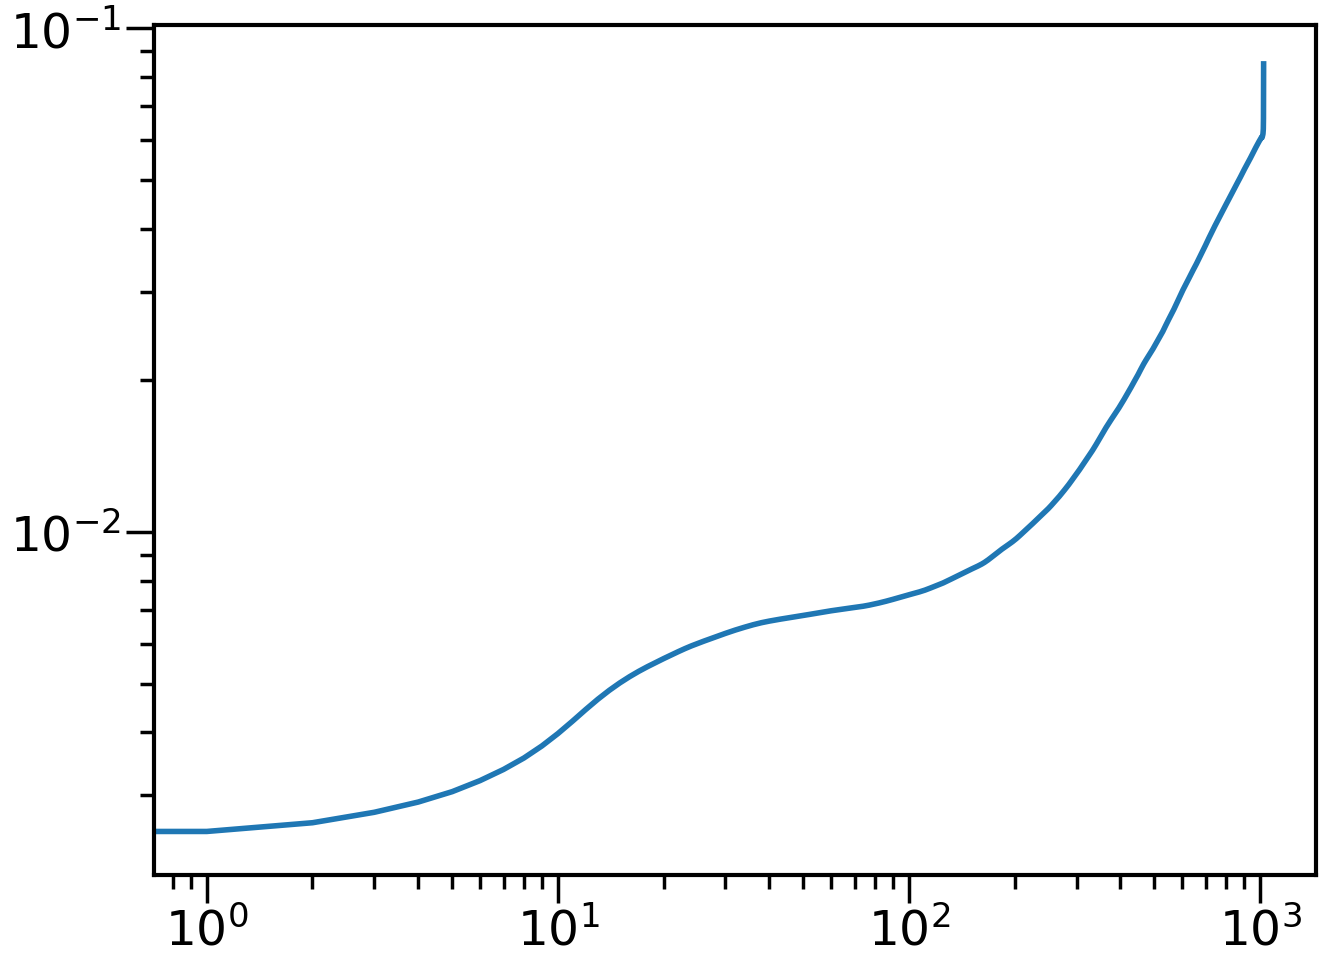

In [40]:
plot(l0,pcl0)
plot(l0,pcl2)
plot(l0,cl0)
loglog()
show()
plot(l0,1-pcl0/pcl2)
xscale('log')
yscale('log')

In [41]:
#use all ell
kappa_win={0:Skylens(**Skylens_kwargs)}
kappa_win[0].gather_data()
kappa_win[1]=Skylens(**Skylens_kwargs2)
kappa_win[1].gather_data()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:91: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 50 1024 2049.0 2
Window done. Size: 0.0
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 50 40 2049.0 2
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
set binned measure done
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 50 1024 2049.0 2
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l2200_w4400_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])
set window_cl: cl0,cl_b done 0.1148216724395752
set window_cl: cl done 0.2040395736694336 1.302 0.0
Win_cli ('galaxy', 'galaxy', 0, 0) ('galaxy', 'galaxy') (0, 0)
set window_cl: cl done 0.23771286

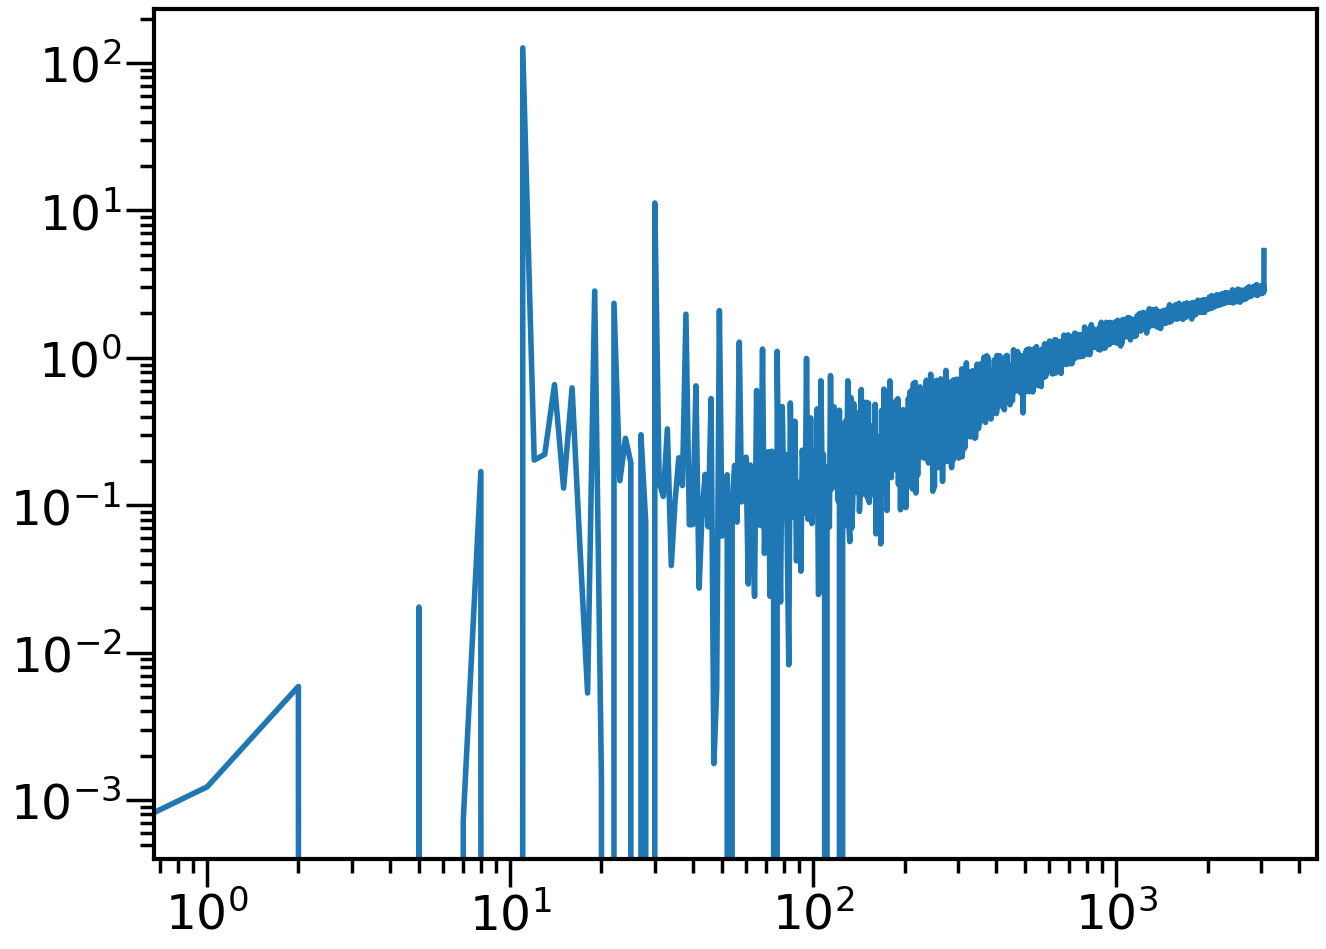

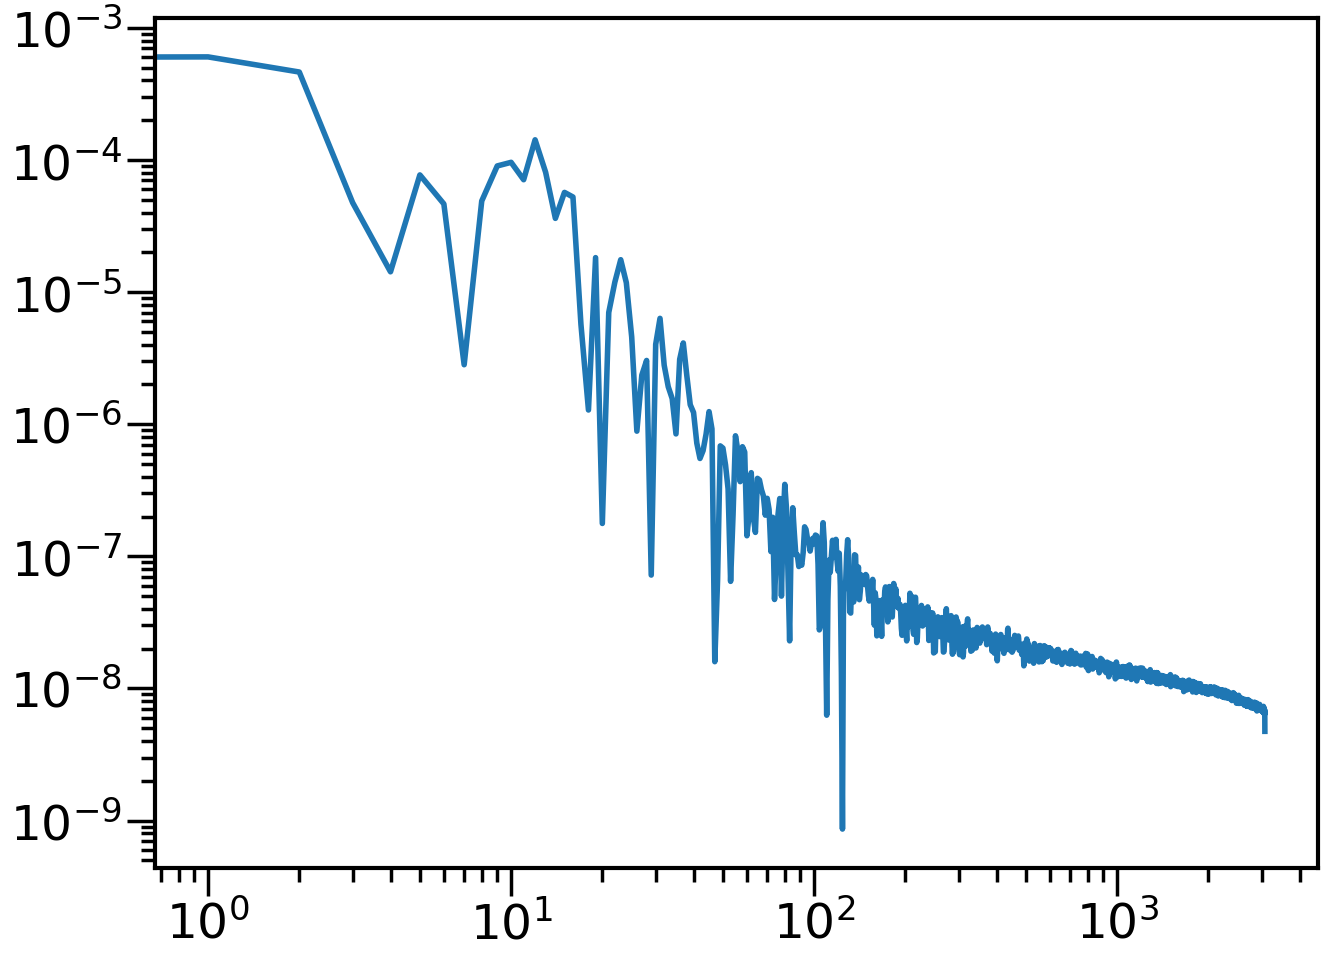

In [42]:
plot(wlt/wlt0-1)
xscale('log')
yscale('log')
show()
plot(np.absolute(wlt-wlt0))
xscale('log')
yscale('log')

In [43]:
clG_win={}
cl0_win={}
for i in kappa_win.keys():
    %time clG_win[i]=kappa_win[i].cl_tomo(corrs=corrs) 
    %time cl0_win[i]=clG_win[i]['stack'].compute()
pcl0_b=cl0_win[0]['pcl_b']
pcl2_b=cl0_win[1]['pcl_b']

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 25.1 s, sys: 981 ms, total: 26.1 s
Wall time: 2.15 s
CPU times: user 294 ms, sys: 1.55 s, total: 1.84 s
Wall time: 2.98 s
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 26.5 s, sys: 1.19 s, total: 27.7 s
Wall time: 2.34 s
CPU times: user 265 ms, sys: 1.6 s, total: 1.87 s
Wall time: 2.94 s


In [44]:
kappa0.l

array([   0,    1,    2, ..., 2045, 2046, 2047])

In [45]:
# kappa_win[1].gather_data()
wltb=kappa0.bin_cl_func(cl=wlt[kappa0.l])
wlt0b=kappa0.bin_cl_func(cl=wlt0[kappa0.l])

(0.001, 0.5)

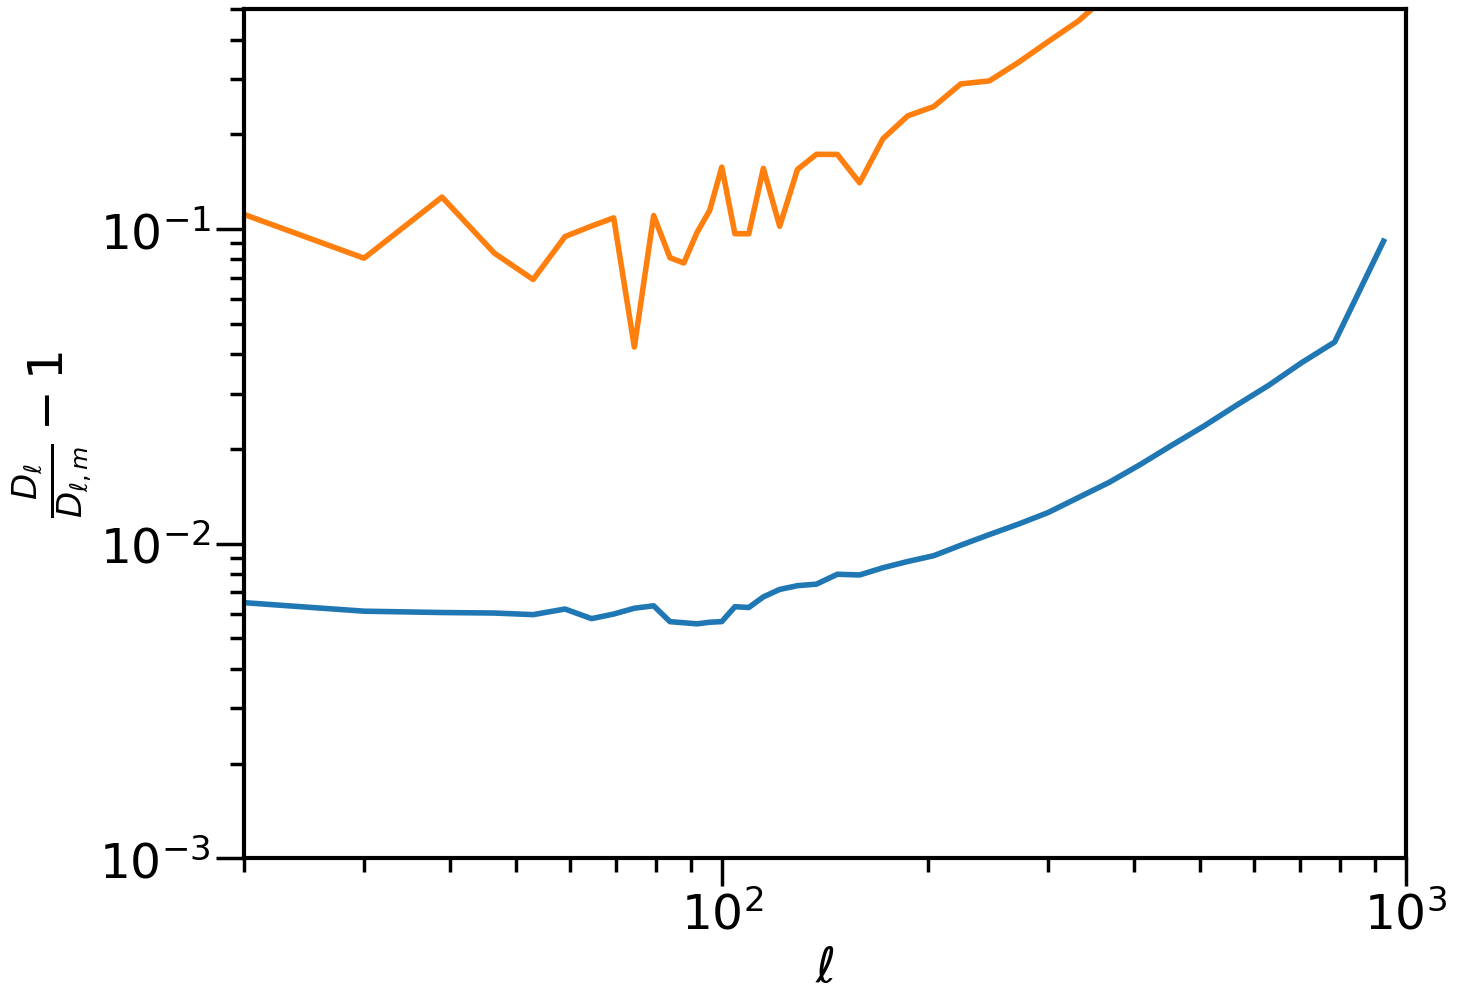

In [46]:
plot(lb,1.-pcl0_b/pcl2_b)
plot(lb,(wltb/wlt0b-1))
xscale('log')
# plot(lb,cl0_win['t']['pcl_b'])
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell}{D_{\ell,m}}-1$')
xlim(20,1000)
ylim(0.001,.5)

(20, 1000)

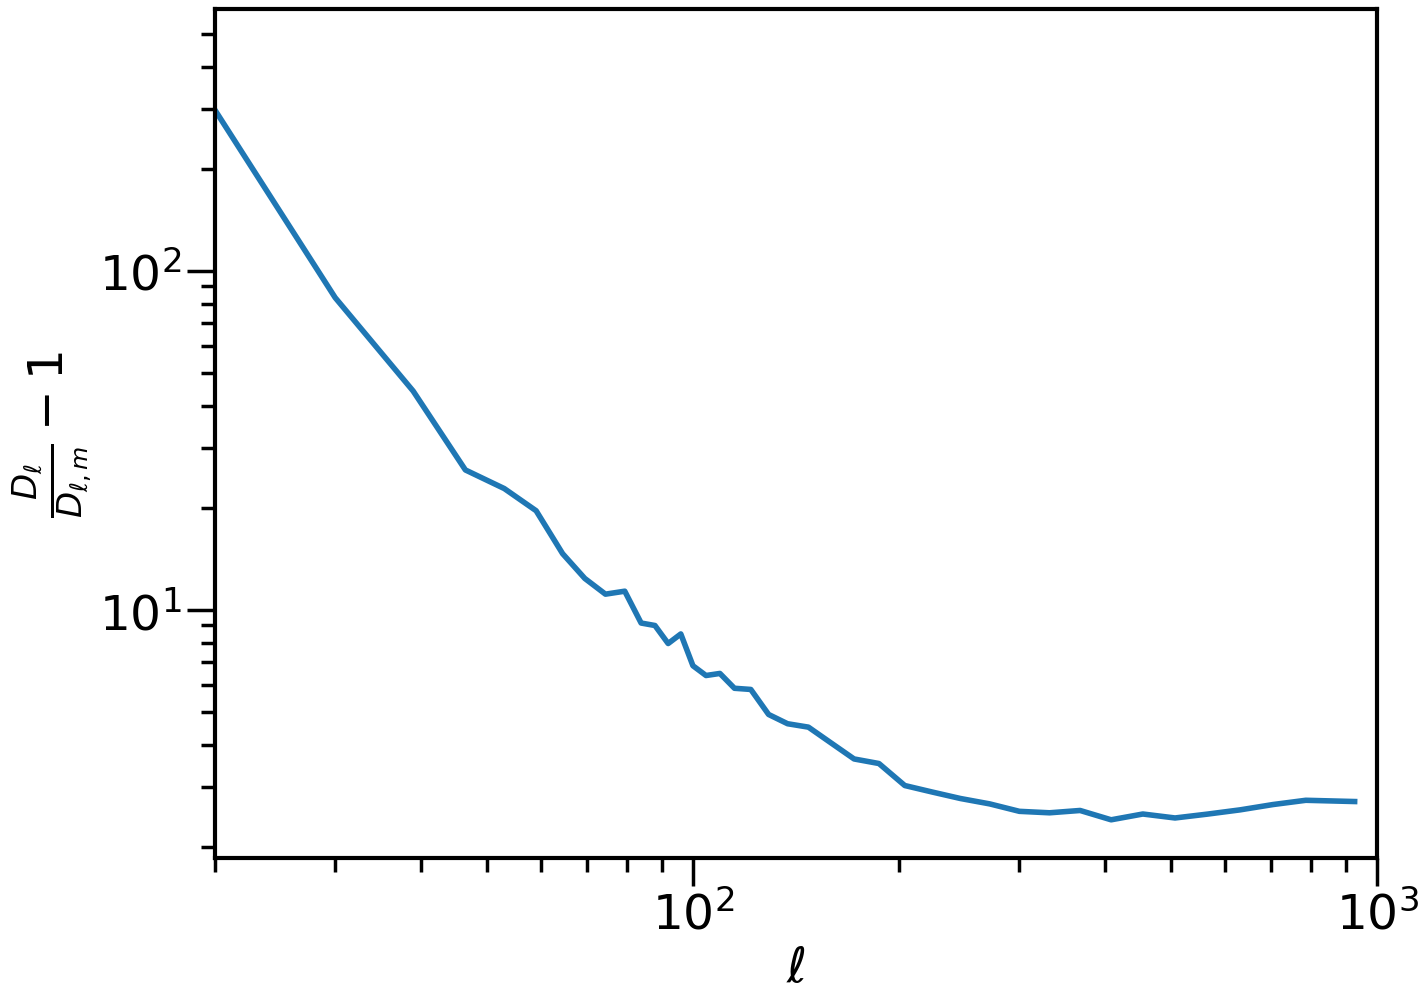

In [47]:
plot(lb,(wltb/pcl0_b))
xscale('log')
# plot(lb,cl0_win['t']['pcl_b'])
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\frac{D_\ell}{D_{\ell,m}}-1$')
xlim(20,1000)
# ylim(0.001,.5)

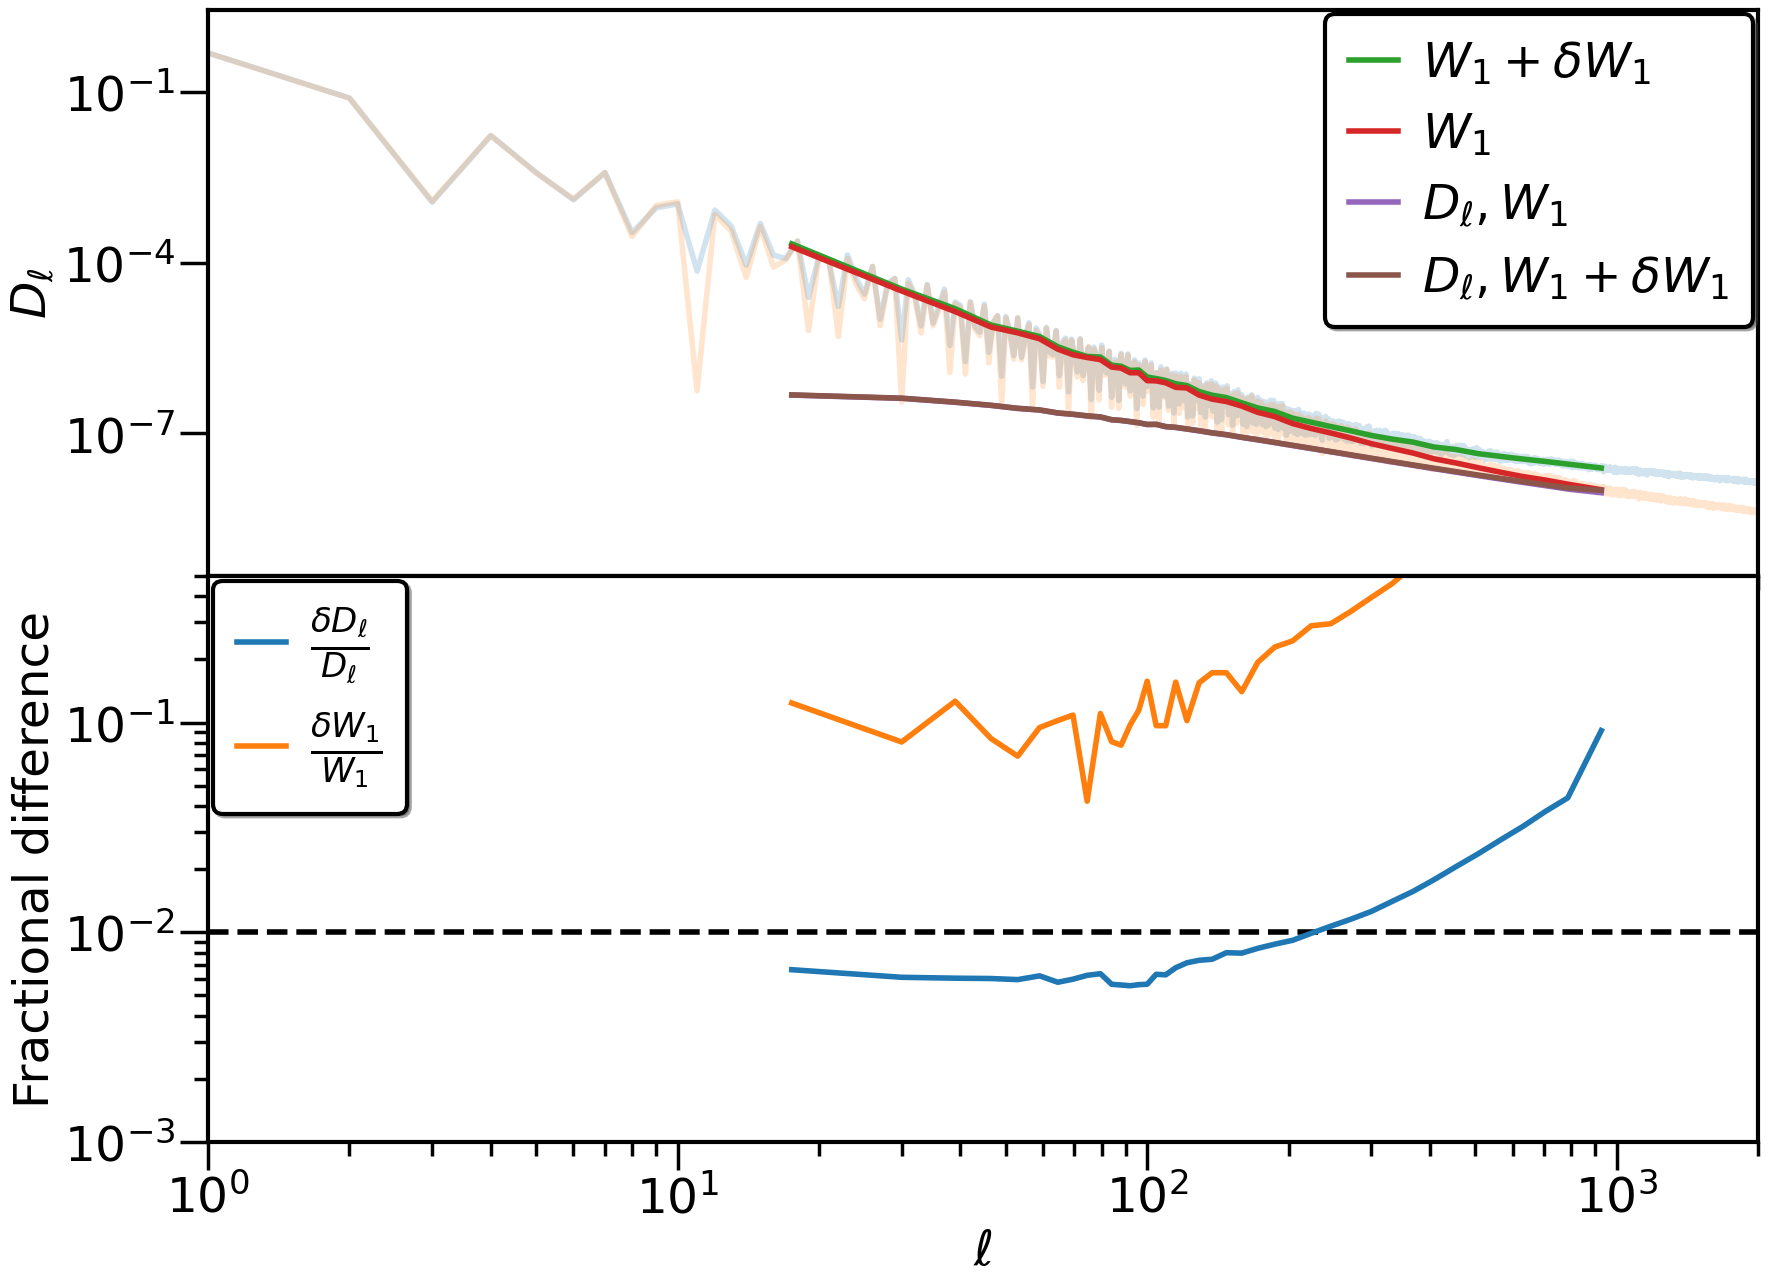

In [48]:
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
ps=ax[0]
pr=ax[1]
ps.plot(wlt,alpha=0.2)
ps.plot(wlt0,alpha=0.2)
ps.plot(lb,wltb,label='$W_1+\delta W_1$')
ps.plot(lb,wlt0b,label='$W_1$')

ps.plot(lb,pcl0_b,label='$D_\ell, W_1$')
ps.plot(lb,pcl2_b,label='$D_\ell, W_1+\delta W_1$')

pr.plot(lb,1.-pcl0_b/pcl2_b,label=r'$\frac{\delta D_\ell}{D_\ell}$')
pr.plot(lb,(wltb/wlt0b-1),label=r'$\frac{\delta W_1}{W_1}$')

pr.set_ylim(0.001,.5)
pr.set_xlim(1,2000)
pr.hlines(0.01,1,2000,ls='--',color='k')
ps.legend()
pr.legend()
ps.set_yscale('log')
ps.set_xscale('log')
pr.set_yscale('log')
pr.set_xlabel('$\ell$')
ps.set_ylabel('$D_\ell$')
pr.set_ylabel('Fractional difference')
fname=fig_home+'window_bias_Dl'
fname+='.pdf'
show()
fig.savefig(fname,bbox_inches='tight',format='pdf')